# Data visualization with Pandas (matplotlib)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'].insert(0, 'Noto Sans CJK TC')

## Lottery data

In [2]:
lottery = pd.read_csv('http://bit.ly/lottery-wide')
lottery.head(10)

,Date,X1,X2,X3,X4,X5,X6,S
0,105/08/12,8,35,43,33,20,42,10
1,105/08/09,15,37,35,17,45,30,41
2,105/08/05,27,40,2,35,22,1,33
3,105/08/02,15,4,20,22,28,29,1
4,105/07/29,28,9,27,15,30,41,13
5,105/07/26,35,41,19,22,9,15,37
6,105/07/22,17,10,33,2,49,27,15
7,105/07/19,7,46,40,33,45,13,39
8,105/07/15,29,24,25,35,33,38,49
9,105/07/12,42,31,46,43,25,34,5


#### Pandas - Apply function to a Series or DataFrame

- **map**: (Series method) recode existing values to a different set of values
- **apply**: (Series method and DataFrame method) apply function to each element of series
- **applymap**: (DataFrame method) apply function to every element of a Dataframe

In [3]:
def to_date(x):
    # x = '105/07/12'
    x_list = x.split('/')
    x_list[0] = str(int(x_list[0]) + 1911)
    return pd.to_datetime('-'.join(x_list))

In [4]:
lottery['Date'] = lottery.Date.map(to_date)
lottery.set_index('Date', inplace=True)

In [5]:
lottery.head()

,X1,X2,X3,X4,X5,X6,S
Date,,,,,,,
2016-08-12,8,35,43,33,20,42,10
2016-08-09,15,37,35,17,45,30,41
2016-08-05,27,40,2,35,22,1,33
2016-08-02,15,4,20,22,28,29,1
2016-07-29,28,9,27,15,30,41,13


In [6]:
lottery.head()

,X1,X2,X3,X4,X5,X6,S
Date,,,,,,,
2016-08-12,8,35,43,33,20,42,10
2016-08-09,15,37,35,17,45,30,41
2016-08-05,27,40,2,35,22,1,33
2016-08-02,15,4,20,22,28,29,1
2016-07-29,28,9,27,15,30,41,13


## Plot directly?

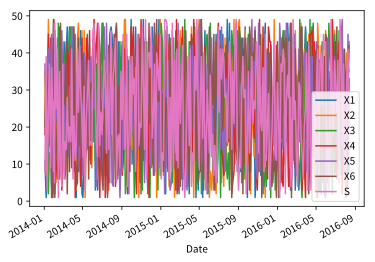

In [7]:
lottery.plot()

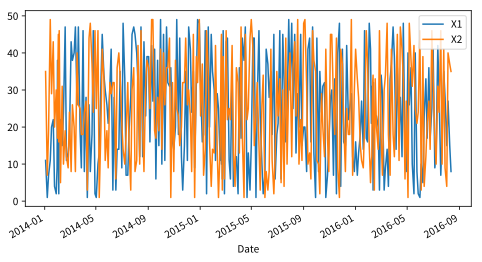

In [8]:
lottery.loc[:, ['X1', 'X2']].plot(figsize=(8, 4))

## Aggregation and Pivot

### 先計算"數字"的數量

In [9]:
lottery_lng = lottery.stack().reset_index()
lottery_lng.head()

,Date,level_1,0
0,2016-08-12,X1,8
1,2016-08-12,X2,35
2,2016-08-12,X3,43
3,2016-08-12,X4,33
4,2016-08-12,X5,20


In [10]:
lottery_lng.columns = ['date', 'ball', 'value']
lottery_lng.head()

,date,ball,value
0,2016-08-12,X1,8
1,2016-08-12,X2,35
2,2016-08-12,X3,43
3,2016-08-12,X4,33
4,2016-08-12,X5,20


In [11]:
lottery_lng['value'] = lottery_lng['value'].apply(lambda x: f'{x:02d}')
lottery_lng['value'].head()

0    08
1    35
2    43
3    33
4    20
Name: value, dtype: object

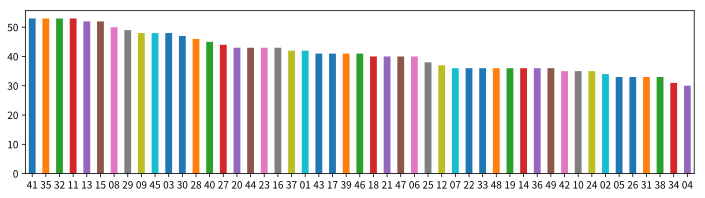

In [14]:
lottery_lng['value'].value_counts(sort=True).plot.bar(rot=0, figsize=(12, 3))

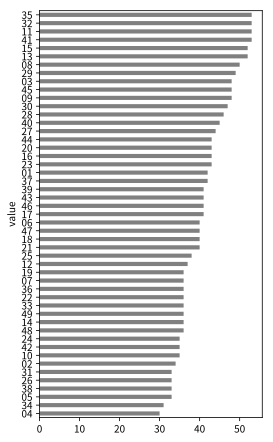

In [15]:
(
    lottery_lng.groupby('value')
    .size()
    .sort_values(ascending=True)
    .plot.barh(rot=0, figsize=(4, 7.5), color='grey')
)

## 預測下一期

In [82]:
def expand_grid(data_dict):
    """Create a dataframe from every combination of given values."""
    import itertools
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

- https://stackoverflow.com/a/50703596/3744499
- https://stackoverflow.com/a/29528483/3744499

In [ ]:
def compute_percentage(x):
    pct = float(x/p['score'].sum()) * 100
    return round(pct, 2)

In [ ]:
# df['percentage'] = df.apply(compute_percentage, axis=1)

In [ ]:
# df.style.background_gradient(cmap='summer')